In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/4/Desktop/정하협/H백화점고객성별예측-20210120T235731Z-001/H백화점고객성별예측/train.csv', encoding='CP949')
test = pd.read_csv('C:/Users/4/Desktop/정하협/H백화점고객성별예측-20210120T235731Z-001/H백화점고객성별예측/test.csv', encoding='CP949')

In [3]:
obj=['주구매코너'] 

In [4]:
train[obj].head()

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A


In [5]:
train[obj] = train[obj].apply(lambda x: x.astype('category').cat.codes)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [7]:
train[obj].head()

,주구매코너
0,24
1,11
2,15
3,24
4,22


In [8]:
train.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [9]:
train.shape

(5000, 18)

In [10]:
train_drop = train.dropna(subset = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])

In [11]:
train_drop.shape

(2235, 18)

In [12]:
train_drop.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [13]:
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]

In [14]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(train[con])

SimpleImputer(strategy='most_frequent')

In [15]:
x = imputer_con.transform(train[con]); x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [16]:
train[con] = x

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [18]:
train.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [19]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22


In [20]:
print(train.총구매액.max())
print(train.총구매액.min())

92868830
-1237971


In [21]:
train = train[train.총구매액 >= 0]

In [22]:
train.shape

(4997, 18)

In [23]:
train.loc[(train.총구매액 >= 0) & (train.총구매액 < 10000000), 'grade'] = 'sliver'
train.loc[(train.총구매액 >= 10000000) & (train.총구매액 < 30000000), 'grade'] = 'gold'
train.loc[(train.총구매액 >= 30000000) & (train.총구매액 < 50000000), 'grade'] = 'platinum'
train.loc[(train.총구매액 >= 50000000), 'grade'] = 'vip'

In [24]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,grade
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,sliver
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,sliver
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15,sliver
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,sliver
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22,sliver


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([3477.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1520.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

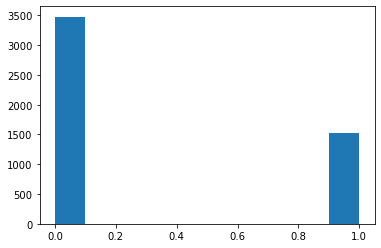

In [26]:
plt.hist((train.gender)) #0은 여자 1은 남자

(array([4668.,    0.,    0.,  302.,    0.,    0.,   19.,    0.,    0.,
           8.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

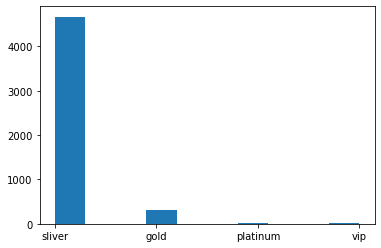

In [27]:
plt.hist((train.grade))

In [28]:
train_gra1 = train[train['grade'] == 'sliver']
train_gra2 = train[train['grade'] == 'gold']
train_gra3 = train[train['grade'] == 'platinum']
train_gra4 = train[train['grade'] == 'vip']

In [29]:
v0 = train_gra4[train_gra4.gender == 0]
v1 = train_gra4[train_gra4.gender == 1]

In [30]:
print(v0[['gender', 'grade']].shape, '여자') #vip 중에서 여자
print(v1[['gender', 'grade']].shape, '남자') #vip 중에서 남자

(3, 2) 여자
(5, 2) 남자


In [31]:
s0 = train_gra1[train_gra1.gender == 0]
s1 = train_gra1[train_gra1.gender == 1]

In [32]:
print(s0[['gender', 'grade']].shape, '여자') #silver 중에서 여자
print(s1[['gender', 'grade']].shape, '남자') #silver 중에서 남자

(3288, 2) 여자
(1380, 2) 남자


In [33]:
g0 = train_gra2[train_gra2.gender == 0]
g1 = train_gra2[train_gra2.gender == 1]

In [34]:
print(g0[['gender', 'grade']].shape, '여자') #gold 중에서 여자
print(g1[['gender', 'grade']].shape) #gold 중에서 남자

(174, 2) 여자
(128, 2)


In [35]:
p0 = train_gra3[train_gra3.gender == 0]
p1 = train_gra3[train_gra3.gender == 1]

In [36]:
print(p0[['gender', 'grade']].shape, '여자') #platinum 중에서 여자
print(p1[['gender', 'grade']].shape, '남자') #platinum 중에서 남자

(12, 2) 여자
(7, 2) 남자


In [37]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,grade
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,sliver
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,sliver
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15,sliver
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,sliver
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22,sliver


In [38]:
print(train.주말방문비율.max())
print(train.주말방문비율.min())

100.0
0.0


In [39]:
train.주말방문비율.value_counts()

0.0      440
50.0     345
33.3     264
100.0    234
25.0     190
        ... 
24.5       1
90.5       1
39.5       1
22.3       1
47.9       1
Name: 주말방문비율, Length: 459, dtype: int64

In [40]:
train.loc[(train.주말방문비율 >= 0) & (train.주말방문비율 < 25), '중독'] = '보통'
train.loc[(train.주말방문비율 >= 25) & (train.주말방문비율 < 50), '중독'] = '적당'
train.loc[(train.주말방문비율 >= 50) & (train.주말방문비율 < 75), '중독'] = '심각'
train.loc[(train.주말방문비율 >= 75), '중독'] = '매우심각'

In [41]:
train.head(2)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,grade,중독
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,sliver,매우심각
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,sliver,적당


In [42]:
train_gg1 = train[train['중독'] == '보통']
train_gg2 = train[train['중독'] == '적당']
train_gg3 = train[train['중독'] == '심각']
train_gg4 = train[train['중독'] == '매우심각']

In [43]:
gg0 = train_gg1[train_gg1.gender == 0]
gg1 = train_gg1[train_gg1.gender == 1]

In [44]:
print(gg0[['gender', '중독']].shape, '여자') #중독수준 보통 중에서 여자
print(gg1[['gender', '중독']].shape, '남자') #중독수준 보통 중에서 남자

(1010, 2) 여자
(386, 2) 남자


In [45]:
ggg0 = train_gg2[train_gg2.gender == 0]
ggg1 = train_gg2[train_gg2.gender == 1]

In [46]:
print(ggg0[['gender', '중독']].shape, '여자') #중독수준 적당 중에서 여자
print(ggg1[['gender', '중독']].shape, '남자') #중독수준 적당 중에서 남자

(1367, 2) 여자
(679, 2) 남자


In [47]:
gggg0 = train_gg3[train_gg3.gender == 0]
gggg1 = train_gg3[train_gg3.gender == 1]

In [48]:
print(gggg0[['gender', '중독']].shape, '여자') #중독수준 심각 중에서 여자
print(gggg1[['gender', '중독']].shape, '남자') #중독수준 심각 중에서 남자

(779, 2) 여자
(312, 2) 남자


In [49]:
ggggg0 = train_gg4[train_gg4.gender == 0]
ggggg1 = train_gg4[train_gg4.gender == 1]

In [50]:
print(ggggg0[['gender', '중독']].shape, '여자') #중독수준 매우심각 중에서 여자
print(ggggg1[['gender', '중독']].shape, '남자') #중독수준 매우심각 중에서 남자

(321, 2) 여자
(143, 2) 남자


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     4997 non-null   int64  
 1   gender     4997 non-null   int64  
 2   총구매액       4997 non-null   int64  
 3   구매건수       4997 non-null   int64  
 4   평균구매가격     4997 non-null   int64  
 5   평균할부개월수    4997 non-null   float64
 6   구매브랜드종류    4997 non-null   int64  
 7   내점일수       4997 non-null   int64  
 8   수입상품_구매비율  4997 non-null   float64
 9   주말방문비율     4997 non-null   float64
 10  가을_구매건수    4997 non-null   float64
 11  겨울_구매건수    4997 non-null   float64
 12  봄_구매건수     4997 non-null   float64
 13  여름_구매건수    4997 non-null   float64
 14  아침_구매건수    4997 non-null   float64
 15  저녁_구매건수    4997 non-null   float64
 16  점심_구매건수    4997 non-null   float64
 17  주구매코너      4997 non-null   int8   
 18  grade      4997 non-null   object 
 19  중독         4997 non-null   object 
dtypes: float

In [52]:
train_grade = pd.get_dummies(train.grade)

In [53]:
train_grade.head()

,gold,platinum,sliver,vip
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [54]:
train_중독 = pd.get_dummies(train.중독)

In [55]:
train_중독.head()

,매우심각,보통,심각,적당
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


In [56]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,grade,중독
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,sliver,매우심각
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,sliver,적당
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15,sliver,적당
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,sliver,적당
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22,sliver,매우심각


In [57]:
tmp1 = train[['gender', '총구매액', '구매건수', '내점일수', '주말방문비율']]

In [58]:
tmp1.head() # train_중독, train_grade

,gender,총구매액,구매건수,내점일수,주말방문비율
0,0,680100,15,10,100.0
1,0,353450,9,8,37.5
2,0,5671400,36,16,37.5
3,0,1964000,28,14,28.6
4,0,885000,5,2,100.0


In [59]:
tmp2 = pd.concat([tmp1, train_중독], axis=1)
train_new = pd.concat([tmp2, train_grade], axis=1)

In [60]:
train_new.head()

,gender,총구매액,구매건수,내점일수,주말방문비율,매우심각,보통,심각,적당,gold,platinum,sliver,vip
0,0,680100,15,10,100.0,1,0,0,0,0,0,1,0
1,0,353450,9,8,37.5,0,0,0,1,0,0,1,0
2,0,5671400,36,16,37.5,0,0,0,1,0,0,1,0
3,0,1964000,28,14,28.6,0,0,0,1,0,0,1,0
4,0,885000,5,2,100.0,1,0,0,0,0,0,1,0


In [62]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

In [63]:
train_new.to_csv("train-prep.csv", index=False)

In [64]:
train_new = pd.read_csv("train-prep.csv", sep=',')

In [65]:
train_new.head()

,gender,총구매액,구매건수,내점일수,주말방문비율,매우심각,보통,심각,적당,gold,platinum,sliver,vip
0,0,680100,15,10,100.0,1,0,0,0,0,0,1,0
1,0,353450,9,8,37.5,0,0,0,1,0,0,1,0
2,0,5671400,36,16,37.5,0,0,0,1,0,0,1,0
3,0,1964000,28,14,28.6,0,0,0,1,0,0,1,0
4,0,885000,5,2,100.0,1,0,0,0,0,0,1,0


In [66]:
train_new['gender'].value_counts()

0    3477
1    1520
Name: gender, dtype: int64

In [67]:
X = np.array(train_new.drop('gender', axis=1))

In [68]:
Y = np.array(train_new['gender'])

In [70]:
print(np.sum(Y == 1), np.sum(Y == 0))

1520 3477


In [71]:
sampler = RandomUnderSampler(random_state=42)

In [74]:
X, Y = sampler.fit_resample(X, Y)

In [75]:
print(np.sum(Y == 1), np.sum(Y == 0))

1520 1520


In [76]:
from sklearn.feature_selection import SelectKBest

In [77]:
selector = SelectKBest(k=5) 
selector.fit(X, Y)
mask = selector.get_support()

In [79]:
print(train_new.drop('gender', axis=1).columns)
print(mask)

Index(['총구매액', '구매건수', '내점일수', '주말방문비율', '매우심각', '보통', '심각', '적당', 'gold',
       'platinum', 'sliver', 'vip'],
      dtype='object')
[ True  True  True False False False False  True False False  True False]


In [80]:
X_sel5 = selector.transform(X)
print(X_sel5)

[[3.197667e+06 4.200000e+01 2.300000e+01 0.000000e+00 1.000000e+00]
 [1.308000e+05 4.000000e+00 3.000000e+00 0.000000e+00 1.000000e+00]
 [8.221040e+06 9.500000e+01 6.000000e+01 0.000000e+00 1.000000e+00]
 ...
 [5.852482e+06 3.700000e+01 2.100000e+01 0.000000e+00 1.000000e+00]
 [6.544980e+05 1.300000e+01 7.000000e+00 0.000000e+00 1.000000e+00]
 [2.554723e+06 3.200000e+01 2.600000e+01 1.000000e+00 1.000000e+00]]


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

Text(0.5, 0, '특성번호')

findfont: Font family ['HYGothic-Extra'] not found. Falling back to DejaVu Sans.
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\4\anaconda3\lib\site-packages\matplotlib\backends\backend

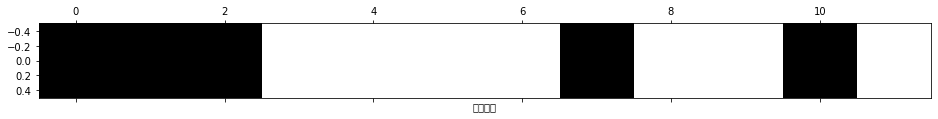

In [82]:
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\H2GTRE.TTF").get_name()
rc('font', family=font_name)

plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("특성번호")

In [83]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [84]:
kf = KFold(n_splits=10, shuffle=True)

In [85]:
scores = []

for train_id, test_id in kf.split(X_sel5):
    x = X_sel5[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(X_sel5[test_id])
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)
    
scores = np.array(scores)
print(scores.mean(), scores.std())

0.5115131578947368 0.018796111351528484


In [86]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [87]:
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.5032258064516129
0.527027027027027


In [88]:
print(clf)

DecisionTreeClassifier()


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [91]:
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                      cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [92]:
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [93]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.5467105263157894
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 20}


In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [95]:
fpr, tpr, _ = roc_curve(Y[test_id], clf_gs.predict_proba(X[test_id])[:,1])
auc(fpr, tpr)

0.6565057371725482

In [96]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

In [97]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X[train_id], Y[train_id])
pred_dummy = dummy.predict(X[test_id])

findfont: Font family ['HYGothic-Extra'] not found. Falling back to DejaVu Sans.


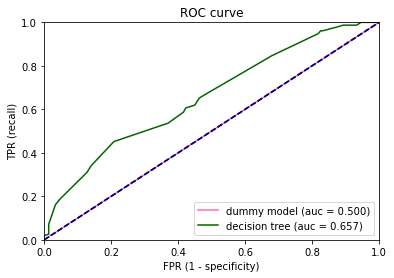

In [98]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y[test_id], 
                                    dummy.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y[test_id], 
                                  clf_gs.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')